In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.datasets import load_iris #load dataset 'iris' from the module
from sklearn.model_selection import train_test_split #for decison tree object
from sklearn.naive_bayes import GaussianNB #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree
from sklearn.tree import plot_tree


In [2]:
#reading data
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
#getting information of dataset
df.info()
df.shape
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

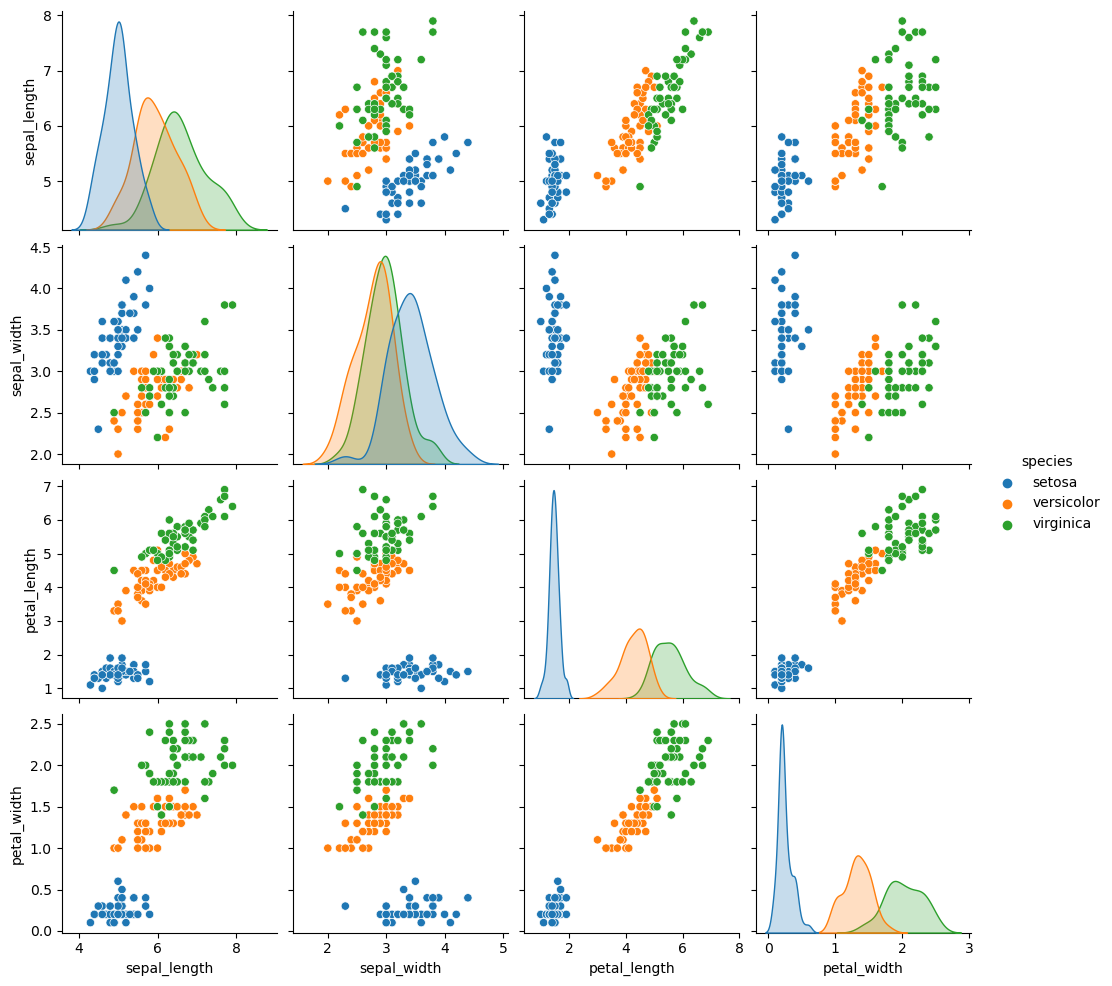

In [4]:
#lets plot pair plot to visualise attributes all at once
sns.pairplot(data=df, hue= 'species')

C:\Users\AN095653\AppData\Local\Temp\ipykernel_15724\3753792277.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

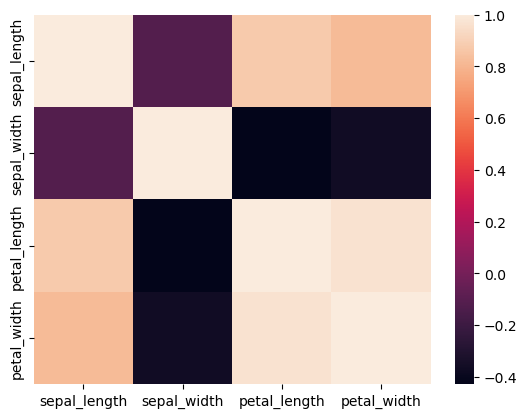

In [5]:
#correlation matrix
sns.heatmap(df.corr())

In [6]:
#auto-correlation – diagonal
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis=1)

In [7]:
#defining the attributes
a = df1

In [8]:
#label encoding 
le = LabelEncoder() #creating object le by assigning class labelEncoder
target = le.fit_transform(target)
target
y = target

In [9]:
#splitting of data into test and train
a_train, a_test, y_train, y_test = train_test_split(a, y, test_size = 0.2, random_state=42)

In [10]:
print("training split input - ", a_train.shape)
print("testing split input - ", a_test.shape)

training split input -  (120, 4)
testing split input -  (30, 4)


In [11]:
#defining naive Bayes algorithm
naive_b = GaussianNB()
naive_b.fit(a_train, y_train)
print("Naive Bayes classifier created")

Naive Bayes classifier created


In [12]:
#predicting values of test data
y_pred = naive_b.predict(a_test)
print("The Classification report - \n", classification_report(y_test, y_pred))

The Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
#extra line
print(y_pred,"\n",y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [14]:
#confusion matrix 
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
